# Isobraic binary phase diagrams

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams. As long as the TDB file is present, each cell in these examples is self contained and can completely reproduce the figure shown.

Units are Kelvin

## Importing modules

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
from pycalphad import Database, equilibrium, variables as v
import numpy as np
from pycalphad.plot.eqplot import eqplot

### Defining file paths for program and database

In [33]:
# Set the file path
# dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\Mod Sc-Zr\\'


### Load database

In [34]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database
# dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad.tdb') #Aluminum database good for Sc
dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad_with_ZR_COST507_Sund.tdb') #Aluminum database addition of Sc (GOOD)
# dbf = Database(dbf_diretory + 'MOD_mc_al_v2.032_ZR_COST507_GOOD.tdb') #Aluminum database good for Sc

# dbf = Database(dbf_diretory + 'COST507_Original.tdb') #Aluminum database

### Convert wt% to mole fraction

In [35]:
# Molar masses (g/mol)
M_Al = 26.9815
M_Sc = 44.9559
M_Zr = 91.224

# Fixed Sc in weight fraction
w_Sc = 0.003  # 0.3 wt%
w_Zr_max = 0.015  # 1.5 wt%

Function to convert fixed wt% Sc to mole fraction given X(ZR)

In [36]:
# Function to calculate Sc mole fraction for fixed wt% Sc given Zr mole fraction
def sc_mole_fraction_from_w(w, x_zr, M_Al, M_Sc, M_Zr):
    numerator = w * (x_zr*(M_Zr - M_Al) + M_Al)
    denominator = M_Sc - w*(M_Sc - M_Al)
    return numerator / denominator

# Function to calculate Zr mole fraction corresponding to fixed wt% Zr given Sc mole fraction
def zr_mole_fraction_from_w(w, x_sc, M_Al, M_Sc, M_Zr):
    numerator = w * (x_sc*(M_Sc - M_Al) + M_Al)
    denominator = M_Zr - w*(M_Zr - M_Al)
    return numerator / denominator

In [37]:
# First, estimate Sc mole fraction at zero Zr
x_sc_initial = sc_mole_fraction_from_w(w_Sc, 0, M_Al, M_Sc, M_Zr)

In [38]:
# Calculate max mole fraction of Zr corresponding to 1.5 wt% (with that Sc)
x_zr_max = zr_mole_fraction_from_w(w_Zr_max, x_sc_initial, M_Al, M_Sc, M_Zr)
x_zr_max

0.004489329798563584

In [39]:
# Create mole fraction arrays
n_points = 50
x_zr_vals = np.linspace(0, x_zr_max, n_points)
x_zr_vals

array([0.00000000e+00, 9.16189755e-05, 1.83237951e-04, 2.74856926e-04,
       3.66475902e-04, 4.58094877e-04, 5.49713853e-04, 6.41332828e-04,
       7.32951804e-04, 8.24570779e-04, 9.16189755e-04, 1.00780873e-03,
       1.09942771e-03, 1.19104668e-03, 1.28266566e-03, 1.37428463e-03,
       1.46590361e-03, 1.55752258e-03, 1.64914156e-03, 1.74076053e-03,
       1.83237951e-03, 1.92399849e-03, 2.01561746e-03, 2.10723644e-03,
       2.19885541e-03, 2.29047439e-03, 2.38209336e-03, 2.47371234e-03,
       2.56533131e-03, 2.65695029e-03, 2.74856926e-03, 2.84018824e-03,
       2.93180722e-03, 3.02342619e-03, 3.11504517e-03, 3.20666414e-03,
       3.29828312e-03, 3.38990209e-03, 3.48152107e-03, 3.57314004e-03,
       3.66475902e-03, 3.75637799e-03, 3.84799697e-03, 3.93961595e-03,
       4.03123492e-03, 4.12285390e-03, 4.21447287e-03, 4.30609185e-03,
       4.39771082e-03, 4.48932980e-03])

In [40]:
# Calculate corresponding Sc mole fractions to keep defined SC wt%
x_sc_vals = np.array([sc_mole_fraction_from_w(w_Sc, xzr, M_Al, M_Sc, M_Zr) for xzr in x_zr_vals])

### Set temperature range

In [41]:
# Temperature range (in K)
T_vals = np.linspace(300, 1400, 50)  # finer temperature steps

### Set conditions
Determine phases

In [42]:
phases = ['FCC_A1', 'AL3SC', 'AL3ZR']
# phases = list(dbf.phases.keys())
# phases

Define elements 

In [43]:
comps = ['AL', 'ZR', 'SC', 'VA']  

### Run equilibrium calculations along the path

In [44]:
# Run equilibrium
eq = equilibrium(dbf, comps, phases,
                 {v.X('SC'): x_sc_vals,
                  v.X('ZR'): x_zr_vals,
                  v.T: T_vals,
                  v.P: 101325})

### Plot the pseudo-binary diagram

In [45]:
target_x_sc = x_sc_vals[0]  # or your fixed value from calculation
idx = (np.abs(eq.X_SC.values - target_x_sc)).argmin()
eq_slice = eq.isel(X_SC=idx)

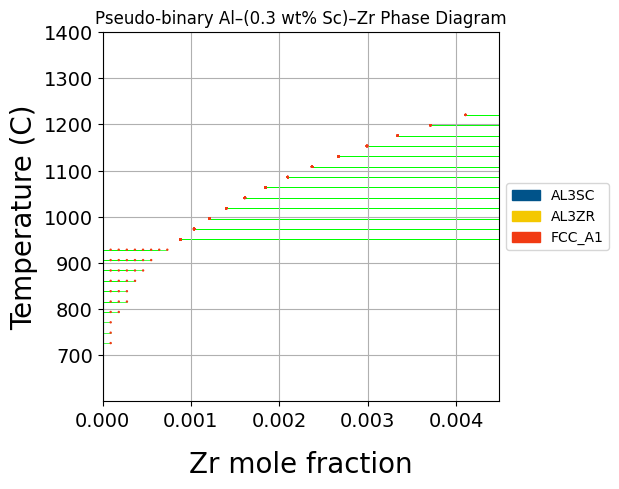

In [46]:
eqplot(eq_slice, x=v.X('ZR'), y=v.T)
plt.title('Pseudo-binary Al–(0.3 wt% Sc)–Zr Phase Diagram')
plt.xlabel('Zr mole fraction')
plt.ylabel('Temperature (C)')
plt.ylim(600.15, 1400.15) # in K
plt.xlim(0, 0.00449)
plt.show()


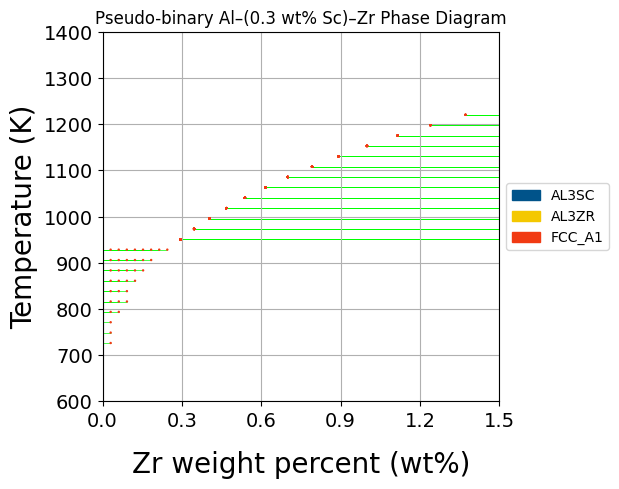

In [47]:
eqplot(eq_slice, x=v.X('ZR'), y=v.T)
plt.title('Pseudo-binary Al–(0.3 wt% Sc)–Zr Phase Diagram')
plt.ylabel('Temperature (K)')

def molefrac_to_wtpercent(x):
    M_Zr = 91.224
    M_Al = 26.9815
    return (x * M_Zr) / (x * M_Zr + (1 - x) * M_Al) * 100

x_zr_limit = 0.00449  # mole fraction limit for 1.5 wt%

plt.xlim(0, x_zr_limit)

# Manually set ticks on mole fraction axis
tick_mf = np.linspace(0, x_zr_limit, 6)  # 6 ticks
tick_wt = molefrac_to_wtpercent(tick_mf)
tick_labels = [f"{wt:.1f}" for wt in tick_wt]

plt.xticks(tick_mf, tick_labels)
plt.xlabel('Zr weight percent (wt%)')
plt.ylim(600, 1400)

plt.show()


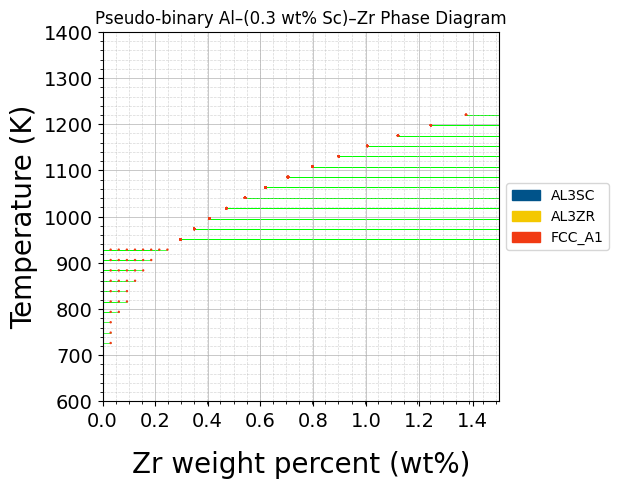

In [48]:
eqplot(eq_slice, x=v.X('ZR'), y=v.T)
plt.title('Pseudo-binary Al–(0.3 wt% Sc)–Zr Phase Diagram')
plt.ylabel('Temperature (K)')

# Conversion functions
def molefrac_to_wtpercent(x):
    M_Zr = 91.224
    M_Al = 26.9815
    return (x * M_Zr) / (x * M_Zr + (1 - x) * M_Al) * 100

def wtpercent_to_molefrac(w):
    M_Zr = 91.224
    M_Al = 26.9815
    return (w / M_Zr) / (w / M_Zr + (100 - w) / M_Al)

# Limit in mole fraction for 1.5 wt% Zr
x_zr_limit = wtpercent_to_molefrac(1.5)
plt.xlim(0, x_zr_limit)
plt.ylim(600, 1400)

# Create evenly spaced ticks in wt% space
wt_ticks = np.arange(0, 1.6, 0.2)  # 0.0, 0.2, 0.4 ... 1.4, 1.6
mf_ticks = wtpercent_to_molefrac(wt_ticks)

# Apply ticks & labels
plt.xticks(mf_ticks, [f"{wt:.1f}" for wt in wt_ticks])
plt.xlabel('Zr weight percent (wt%)')

# Add grid (major + minor)
plt.grid(True, which='major', linestyle='-', linewidth=0.7, alpha=0.7)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, alpha=0.5)
plt.minorticks_on()

plt.show()
